In [12]:
# Import NumPy for numerical operations
import numpy as np

# Import PyTorch for building and training neural networks
import torch
import torch.nn as nn
import torch.optim as optim

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Import a utility module for additional plotting functions
import utils_plots

# Import the time module to time our training process
import time

# Ignore Warning Messages
import warnings
warnings.filterwarnings("ignore")


from ricker import ricker
from gll import gll
from lagrange1st import lagrange1st 

In [27]:
# Initialization of setup
# ---------------------------------------------------------------
nt    = 10_000       # number of time steps
xmax  = 1000.        # Length of domain [m]
vs    = 2500.         # S velocity [m/s]
rho   = 2200          # Density [kg/m^3]
mu    = rho * vs**2   # Shear modulus mu
N     = 5           # Order of Lagrange polynomials
ne    = 125           # Number of elements
Tdom  = 0.2            # Dominant period of Ricker source wavelet
iplot = 5            # Plotting each iplot snapshot

# variables for elemental matrices
Me = np.zeros(N+1, dtype =  float)
Ke = np.zeros((N+1, N+1), dtype =  float)
# ----------------------------------------------------------------

# Initialization of GLL points integration weights
[xi, w] = gll(N)    # xi, N+1 coordinates [-1 1] of GLL points
                    # w Integration weights at GLL locations
# Space domain
le = xmax/ne        # Length of elements
# Vector with GLL points  
k = 0

# Initialization of physical coordinates xg in the entire space (commment added May 15, 2020)
xg = np.zeros((N*ne)+1) 
xg[k] = 0
for i in range(1,ne+1):
    for j in range(0,N):
        k = k+1
        xg[k] = (i-1)*le + .5*(xi[j+1]+1)*le

# ---------------------------------------------------------------
dxmin = min(np.diff(xg))  
eps = 0.2           # Courant value
dt = eps*dxmin/vs   # Global time step
# initialize source time function and force vector f
src  = ricker(dt,Tdom)
dt

7.518229634257068e-05

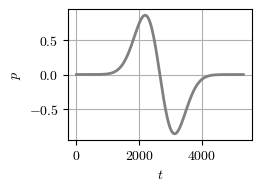

In [28]:
# Create a figure for the plot
fig, ax = plt.subplots(figsize=(2.5, 1.8))

# Plot the function
ax.plot(src, color='gray', linewidth=2)

# Set the labels for the x and y axes
ax.set_xlabel('$t$')
ax.set_ylabel('$p$')

# Display the grid
ax.grid(True)

# Set the title for the plot
#ax.set_title(r'$y=\sin(x)$')

# Save the plot as a PDF file in the 'imgs' directory
#fig.savefig('imgs/1_sine_function.png', format='png')

# Display the plot
plt.show()